In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10


Using TensorFlow backend.


## Round 2: Interactive computing an cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

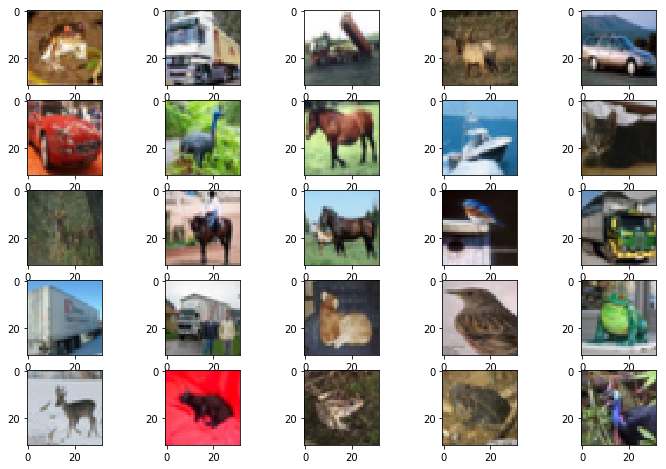

In [3]:
fig, axs = plt.subplots(5,5, figsize=(12,8))
for ax, img, lbl in zip(axs.flatten(), x_train, y_train):
    ax.imshow(img)
    
#fig.tight_layout()

## Round 3: Building a convolutional neural net with Keras & Tensorflow

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam

from keras.utils import to_categorical

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [6]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, len(labels))
y_test = to_categorical(y_test, len(labels))


In [8]:
training = model.fit(x_train, y_train,
                  batch_size=128,
                  validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s - loss: 1.6730 - acc: 0.4035 - val_loss: 1.4135 - val_acc: 0.4936
Epoch 2/10
50000/50000 [==============================] - 5s - loss: 1.3315 - acc: 0.5286 - val_loss: 1.2704 - val_acc: 0.5541
Epoch 3/10
50000/50000 [==============================] - 5s - loss: 1.2044 - acc: 0.5802 - val_loss: 1.1774 - val_acc: 0.5818
Epoch 4/10
50000/50000 [==============================] - 5s - loss: 1.1112 - acc: 0.6127 - val_loss: 1.0976 - val_acc: 0.6139
Epoch 5/10
50000/50000 [==============================] - 5s - loss: 1.0397 - acc: 0.6382 - val_loss: 1.0613 - val_acc: 0.6278
Epoch 6/10
50000/50000 [==============================] - 5s - loss: 0.9825 - acc: 0.6603 - val_loss: 1.0101 - val_acc: 0.6504
Epoch 7/10
50000/50000 [==============================] - 5s - loss: 0.9280 - acc: 0.6799 - val_loss: 0.9642 - val_acc: 0.6707
Epoch 8/10
50000/50000 [==============================] - 5s 

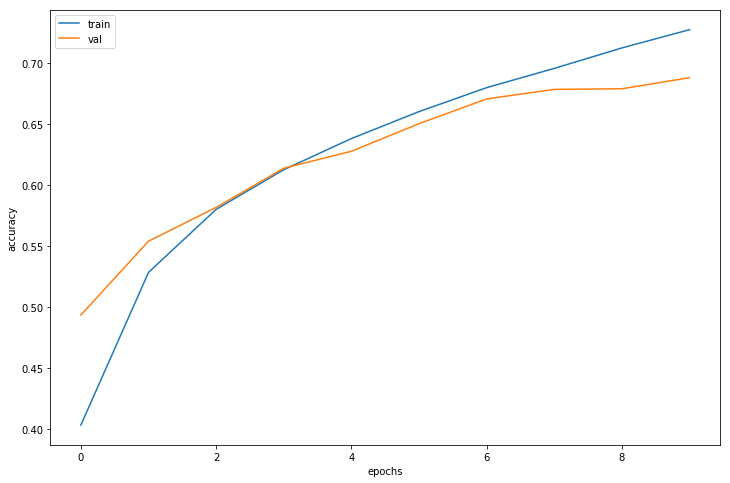

In [9]:
plt.figure(figsize=(12,8))
plt.plot(training.history["acc"], label="train")
plt.plot(training.history["val_acc"], label="val")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")


In [10]:
model.save("./model.h5")

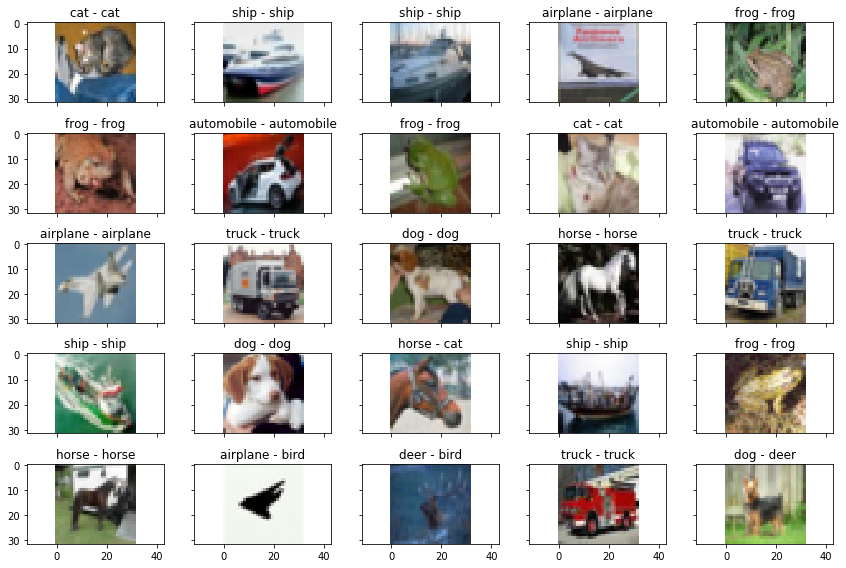

In [11]:
fig, axs = plt.subplots(5,5, sharex=True, sharey=True, figsize=(12,8))
for ax, img, lbl in zip(axs.flatten(), x_test, y_test):
    
    prediction = model.predict(img[np.newaxis, ...])
    
    ax.imshow(img)
    actual = labels[np.argmax(lbl)]
    predicted = labels[np.argmax(prediction)]
    ax.set_title("%s - %s"%(actual, predicted ))
    
fig.tight_layout()
